## **MileStone_4**

1.   Build a Feature Importance notebook discussing feature importance
2. Conclusions




## **Import Packages & Functions**
The "getfile" function splits the loaded dataset into debuggin_dataset & working_dataset by a certain year.

In [ ]:
import pandas
import numpy
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings

def getfile(location_pair,**kwargs):
    (loc,gdrive)=location_pair
    loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]

    #Convert these datasets to pandas
    raw_dataset=pandas.read_csv(loc,**kwargs)
    #Convert datetime to pandas timestamps
    raw_dataset['DATE'] = pandas.to_datetime(raw_dataset['DATE'], format='%Y / %m')

    ## seperate the data by "year"
    split_date = '1992-01-01'
    debugging_dataset = raw_dataset[raw_dataset['DATE'] < split_date] #1990-1991 (2 years)
    debugging_dataset = debugging_dataset.sort_values(by='DATE', ascending=True)
    debugging_dataset = debugging_dataset.reset_index(drop=True) # reset the data index

    working_dataset = raw_dataset[raw_dataset['DATE'] >= split_date] #1992-2023 (~32 years)
    working_dataset = working_dataset.sort_values(by='DATE', ascending=True)
    working_dataset = working_dataset.reset_index(drop=True) # reset the data index

    return raw_dataset, debugging_dataset, working_dataset


# **Load the dataset from CSV files**
There are two datasets we download from open-sources: New York population_weather data & New York tonnage data.
We merged these two datasets before generating the debugging and working datasets.  


In [ ]:
# **Import the CSV files**
fname_1=("NY_Population_Weather_Data.csv","https://drive.google.com/file/d/1DkB88nrVF2B60Rjxi_7fzRnD31-LUqXH/view?usp=sharing") #Load the New York population&weather dataset.
fname_2=("NY_Tonnage_Data_v2.csv","https://drive.google.com/file/d/1-57Sr-WC3g5MRxSXCun6HpD-SB1C-B6Q/view?usp=sharing") #Load the New York tonnage dataset.

raw_dataset_1, debugging_dataset_1, working_dataset_1=getfile(fname_1)
raw_dataset_2, debugging_dataset_2, working_dataset_2=getfile(fname_2)
print("NY_Population_Weather_Data_dataset dimension:", raw_dataset_1.shape)
print("NY_Tonnage_Data_dataset dimension:", raw_dataset_2.shape)

### **Merge the working_dataset:**
working_dataset = pandas.merge(working_dataset_1, working_dataset_2, on=["DATE", "BOROUGH"], how='right')
working_dataset.to_pickle('./working_dataset.pkl')#Pickle the data
#print(debugging_dataset.head())

### **Merge the debug_dataset:**
debugging_dataset = pandas.merge(debugging_dataset_1, debugging_dataset_2, on=["DATE", "BOROUGH"], how='right')
debugging_dataset.to_pickle('./debugging_dataset.pkl')#Pickle the data

#debugging_dataset = working_dataset
#debugging_dataset.head()

NY_Population_Weather_Data_dataset dimension: (2023, 11)
NY_Tonnage_Data_dataset dimension: (1983, 9)


## **Choose the dataset here:**

In [ ]:
#dataset = debugging_dataset
dataset = working_dataset

print(dataset.shape)
dataset.head()

(1909, 18)


,DATE,BOROUGH,POPULATION,POPULATION PERCENTAGE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS
0,1992-01-01,Bronx,1203789.0,16.44,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,42042.7,0.0,0.0,0.0,0.0,0.0,0.0
1,1992-01-01,Brooklyn,2300664.0,31.42,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,71870.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992-01-01,Manhattan,1487536.0,20.31,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,44808.9,0.0,0.0,0.0,0.0,0.0,0.0
3,1992-01-01,Queens,1951598.0,26.65,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,59120.9,0.0,0.0,0.0,0.0,0.0,0.0
4,1992-01-01,Staten Island,378977.0,5.18,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,12628.6,0.0,0.0,0.0,0.0,0.0,0.0


## **Data pre-process on the debugging dataset(one-hot, imputer, and scaler)**
Because the type of Borough data was stored in 'String' instead of numerical values, we applied one-hot to split the data into multiple columns.
The Data data was split into "year" and "month" for representing.

In [ ]:
#Apply One-Hot to separate the BOROUGH types & DATE in columns
dataset = pandas.get_dummies(dataset, columns=['BOROUGH'], prefix=['BOROUGH']) #one-hot on BOROUGH
dataset['DATE'] = pandas.to_datetime(dataset['DATE']) # separate the date into two columns, "year" & "month"
dataset['YEAR'] = dataset['DATE'].dt.year #add new column "year"
dataset['MONTH'] = dataset['DATE'].dt.month #add new column "month"
dataset = dataset.drop(columns=['DATE']) #drop the "DATE" columns
dataset.head()

,POPULATION,POPULATION PERCENTAGE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN,REFUSETONSCOLLECTED,...,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,YEAR,MONTH
0,1203789.0,16.44,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,42042.7,...,0.0,0.0,0.0,1,0,0,0,0,1992,1
1,2300664.0,31.42,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,71870.0,...,0.0,0.0,0.0,0,1,0,0,0,1992,1
2,1487536.0,20.31,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,44808.9,...,0.0,0.0,0.0,0,0,1,0,0,1992,1
3,1951598.0,26.65,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,59120.9,...,0.0,0.0,0.0,0,0,0,1,0,1992,1
4,378977.0,5.18,NaN,42.8,38.0,2.06,5.85,-1.72,9112.0,12628.6,...,0.0,0.0,0.0,0,0,0,0,1,1992,1


### **Generate the input features and targeting label for training**
X is the feed-in feature (16 features)

Y is the targeting label (7 types of trash)

In [ ]:
### **Replace the 'nan' values & normalize the values**
imputer = SimpleImputer(missing_values=numpy.nan, strategy='constant', fill_value=0) #replace the 'nan' value to be 0
imputer_mean = SimpleImputer(missing_values=numpy.nan, strategy='mean') #replace the 'nan' value to be mean
scaler = StandardScaler() #standard normalization

### **Generate the input features (X)**
X = dataset.drop(columns=['REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED','RESORGANICSTONS','SCHOOLORGANICTONS','LEAVESORGANICTONS',	'XMASTREETONS']) #only remain the input features we need
X[['AWND','PRCP','SNOW','TAVG','TMAX','TMIN','TSUN']] = imputer.fit_transform(X[['AWND','PRCP','SNOW','TAVG','TMAX','TMIN','TSUN']])  #replace the 'nan' value to be 0
X[['POPULATION','POPULATION PERCENTAGE']] = imputer_mean.fit_transform(X[['POPULATION','POPULATION PERCENTAGE']])  #replace the 'nan' value to be mean
X[['POPULATION','POPULATION PERCENTAGE','AWND','PRCP','SNOW','TAVG','TMAX','TMIN','TSUN','MONTH','YEAR']] = scaler.fit_transform(X[['POPULATION','POPULATION PERCENTAGE','AWND','PRCP','SNOW','TAVG','TMAX','TMIN','TSUN','MONTH','YEAR']]) #standard scale

print('Features shape:',X.shape)
print('-----------------------------------------------------------------------------------')
X

Features shape: (1909, 16)
-----------------------------------------------------------------------------------


,POPULATION,POPULATION PERCENTAGE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,TSUN,BOROUGH_Bronx,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,YEAR,MONTH
0,-0.523856,-0.387869,-1.892066,-1.053370,-0.161601,-1.275027,-1.246354,-1.297848,1.697177,1,0,0,0,0,-1.676660,-1.587871
1,0.896482,1.169563,-1.892066,-1.053370,-0.161601,-1.275027,-1.246354,-1.297848,1.697177,0,1,0,0,0,-1.676660,-1.587871
2,-0.156433,0.014485,-1.892066,-1.053370,-0.161601,-1.275027,-1.246354,-1.297848,1.697177,0,0,1,0,0,-1.676660,-1.587871
3,0.444478,0.673638,-1.892066,-1.053370,-0.161601,-1.275027,-1.246354,-1.297848,1.697177,0,0,0,1,0,-1.676660,-1.587871
4,-1.591900,-1.558542,-1.892066,-1.053370,-0.161601,-1.275027,-1.246354,-1.297848,1.697177,0,0,0,0,1,-1.676660,-1.587871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1904,0.038766,-0.105078,-1.892066,-1.779239,-0.420567,-1.513004,-1.895605,-1.091794,-0.350717,0,0,1,0,0,1.706675,0.737596
1905,0.934851,0.736019,-1.892066,-1.779239,-0.420567,-1.513004,-1.895605,-1.091794,-0.350717,0,0,0,1,0,1.706675,0.737596
1906,-0.209198,-0.337965,-1.892066,-1.779239,-0.420567,-1.513004,-1.895605,-1.091794,-0.350717,1,0,0,0,0,1.706675,0.737596
1907,1.346830,1.122778,-1.892066,-1.779239,-0.420567,-1.513004,-1.895605,-1.091794,-0.350717,0,1,0,0,0,1.706675,0.737596


In [ ]:
### **Generate the targeting data (Y)**
Y = dataset[['REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED','RESORGANICSTONS','SCHOOLORGANICTONS','LEAVESORGANICTONS',	'XMASTREETONS']] #Amount of Tonnage (per type of trash)
#standard scale
warnings.filterwarnings("ignore")
Y[['REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED','RESORGANICSTONS','SCHOOLORGANICTONS','LEAVESORGANICTONS',	'XMASTREETONS']] = scaler.fit_transform(Y[['REFUSETONSCOLLECTED','PAPERTONSCOLLECTED','MGPTONSCOLLECTED','RESORGANICSTONS','SCHOOLORGANICTONS','LEAVESORGANICTONS',	'XMASTREETONS']])

print('Target shape:',Y.shape)
print('-----------------------------------------------------------------------------------')
Y

Target shape: (1909, 7)
-----------------------------------------------------------------------------------


,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS
0,-0.110381,-1.568454,-1.638242,-0.318957,-0.394507,-0.152972,-0.25101
1,1.381347,-1.568454,-1.638242,-0.318957,-0.394507,-0.152972,-0.25101
2,0.027963,-1.568454,-1.638242,-0.318957,-0.394507,-0.152972,-0.25101
3,0.743737,-1.568454,-1.638242,-0.318957,-0.394507,-0.152972,-0.25101
4,-1.581443,-1.568454,-1.638242,-0.318957,-0.394507,-0.152972,-0.25101
...,...,...,...,...,...,...,...
1904,-1.830268,-1.085779,-1.228606,-0.257409,-0.253167,-0.152972,-0.25101
1905,-1.483829,-1.082988,-0.843838,0.971871,-0.015572,-0.152972,-0.25101
1906,-1.791254,-1.352133,-1.249513,-0.278065,-0.108173,-0.152972,-0.25101
1907,-1.344050,-0.954835,-0.945642,-0.095528,-0.198338,-0.152972,-0.25101


# **Define Model and Seperate out Training vs Testing Data**

In [ ]:
import torch
import torch.nn as nn
from torch.optim import lr_scheduler
class RegressionModel_tunning(nn.Module):

    def __init__(self, input_size, hidden_sizes, output_size=7, SEED=0):
        super(RegressionModel_tunning, self).__init__()
        if SEED is not None:
            torch.manual_seed(SEED)
        layers = []
        for hidden_size in hidden_sizes:
            layers.append(nn.Linear(input_size, hidden_size)) #simple linear layers
            layers.append(nn.ReLU()) #apply ReLU as an acitivation layer for each hidden layers
            input_size = hidden_size #ensure the dimension between layers

        layers.append(nn.Linear(hidden_sizes[-1], output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        out = self.model(x)
        return out

### Split the dataset into training/validation/testing set by a ratio 8:1:1
X_train,X_temp,Y_train,Y_temp=train_test_split(X,Y,test_size=0.2,random_state=42)
X_val,X_test,Y_val,Y_test=train_test_split(X_temp,Y_temp,test_size=0.5,random_state=42)

X_tf = torch.tensor(X_train.values, dtype=torch.float32) #convert the dataset into tensor type for feeding the Pytorch model
Y_tf = torch.tensor(Y_train.values, dtype=torch.float32) #convert the dataset into tensor type for feeding the Pytorch model
X_test_tf = torch.tensor(X_test.values, dtype=torch.float32) #convert the dataset into tensor type for feeding the Pytorch model
Y_test_tf = torch.tensor(Y_test.values, dtype=torch.float32) #convert the dataset into tensor type for feeding the Pytorch model
X_val_tf = torch.tensor(X_val.values, dtype=torch.float32) #convert the dataset into tensor type for feeding the Pytorch model
Y_val_tf = torch.tensor(Y_val.values, dtype=torch.float32) #convert the dataset into tensor type for feeding the Pytorch model

# **Train Model**

In [ ]:
###Train the model with mini-batch learning and tunned hyperparameters
from torch.utils.data import DataLoader, TensorDataset
model2 = RegressionModel_tunning(input_size=len(X.columns),hidden_sizes=[256, 128, 64, 32])  # Apply the best hidden layer dimension from the hyperparameter tunning
Loss = nn.MSELoss() #choose the loss function (Mean Squared Error)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.0079) #apply Stochastic Gradient Descent and a constant learning rate = 0.01 for training
#scheduler = lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.9) #then decrease
dataset = TensorDataset(X_tf, Y_tf)
training_loader = DataLoader(dataset, batch_size=64, shuffle=True)
best_val_loss = float('inf')
MAX_iter = 1000

for itr in range(MAX_iter):
  for i, data in enumerate(training_loader): # train on each mini-batch
    inputs, labels = data
    optimizer.zero_grad() #start with zero gradient
    outputs = model2(inputs) #input the tensors into model to get the outputs
    lossvalue = Loss(outputs, labels)  #compute the loss
    lossvalue.backward()
    optimizer.step()

    ### Validation
    model2.eval()
    with torch.no_grad():
        val_outputs = model2(X_val_tf)
        val_loss = Loss(val_outputs, Y_val_tf)

    if val_loss < best_val_loss:
      best_val_loss = val_loss
      #scheduler.step()
  if itr %100 == 0:
      print("iteration {}: training loss={:.5f}, validation loss={:.5f}, learning rate={:.10f}".format(itr, lossvalue.item(), val_loss.item(), optimizer.param_groups[0]['lr']))

iteration 0: training loss=0.68537, validation loss=1.16146, learning rate=0.0079000000
iteration 100: training loss=1.73781, validation loss=0.79304, learning rate=0.0079000000
iteration 200: training loss=0.36841, validation loss=0.65092, learning rate=0.0079000000
iteration 300: training loss=0.76048, validation loss=0.62176, learning rate=0.0079000000
iteration 400: training loss=0.38958, validation loss=0.60030, learning rate=0.0079000000
iteration 500: training loss=0.48255, validation loss=0.56730, learning rate=0.0079000000
iteration 600: training loss=0.30116, validation loss=0.54406, learning rate=0.0079000000
iteration 700: training loss=0.23541, validation loss=0.51773, learning rate=0.0079000000
iteration 800: training loss=0.18320, validation loss=0.49939, learning rate=0.0079000000
iteration 900: training loss=0.20831, validation loss=0.48804, learning rate=0.0079000000


Here we import a library that extracts out the Shapley values discussed in class.

In [ ]:
!pip install https://github.com/ceshine/shap/archive/master.zip

  Using cached https://github.com/ceshine/shap/archive/master.zip
  Preparing metadata (setup.py) ... done


In [ ]:
import sys
import gc
import torch.nn as nn
import torch
from torch.nn.utils.weight_norm import weight_norm
from sklearn import preprocessing
import shap
import numpy as np
import joblib

Define the model we will be etracting Shapley values from a larger dataset.

In [ ]:
e = shap.DeepExplainer(model2, X_tf)

Get the Shapley values for a subset of the large data set.

In [ ]:
shap_values = e.shap_values(X_test_tf)

In [ ]:
good_features = ['Population', 'Population Percentage', 'Avg. Wind Speed', 'Rainfall', 'Snowfall', 'Avg. Temp',
       'Max Temp.', 'Min Temp.', 'Sun Time', 'Borough (Bronx)', 'Borough (Brooklyn)',
       'Borough (Manhattan)', 'Borough (Queens)', 'Borough (Staten Island)', 'Year',
       'Month']
good_labels = ['Refuse Tonnage', 'Paper Tonnage', 'Metal, Glass, and Plastic Tonnage', 'Residential Organics Tonnage', 'School Organic Tonnage', 'Leaves Organic Tonnage', 'Christmas Tree Tonnage']


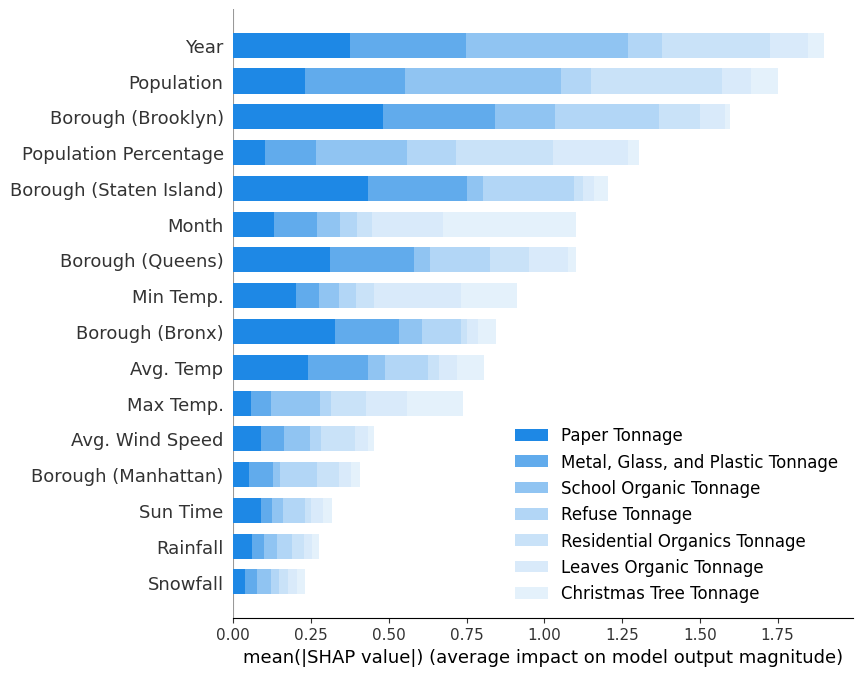

In [ ]:
plt = shap.summary_plot(shap_values, features=X, feature_names=good_features, plot_type='bar', class_names = good_labels)


### **Conclusion (Feature Analysis)**

By analysing the above results , the most important features to predict the tonnage was the polulation, year, month, and specific borough. The average/minimal temperature for each month also apeared to help but to a far lesser degree than the population, month, and year.

It was further found that the TSUN, PRCP, SNOW, and had minimal impact on the model. Surpising, knowlege that the borough was Manhatten had a low inpact on the ability to predict that borough's tonnage.

# **Conclusion**



The purpose of this project was to implement a deep learning model to predict the total collected volumes of various waste streams in New York City. In order to train, test, and tune this model, historical data for collected volumes of various waste streams, by borough, as well as population and weather data were used. From these datasets, 16 features were identified and used. The hyperparameters of hidden layer dimension, number of layers, number of epochs, and batch size were then explored and optimized.. For the dimensions and number of hidden layers, 4 hidden layers with sizes [256,128,64,32] were identified as the best performing in terms of accuracy. Number of epochs was limited to 3000, which resulted in good accuracy while retaining good run times. Mini-batching also significantly increased performance, by up to 30%.

A feature importance analysis was performed. Shapley values were extracted, and the most important features were identified as the year, population, population percentage, month, minimum temperature, and average temperature. As borough data was one-hot encoded, each individual borough was considered a feature. An interesting trend emerged, where the boroughs had a wide spread of importances. For instance, Brooklyn, Staten Island, and Queens had high importance, whereas the Bronx and Manhattan had lower importance. This could be attributed to the fact that the latter boroughs are more densely populated, with less yards, or trees, and more commercial businesses. As a result, seasonal changes in waste streams such as yard waste are much less in those two boroughs.

Different optimizers were then tried to identify the best performer, including: Adadelta, Adagrad, Adam, AdamW, Adamax, ASGD, NAdam, RAdam, RMSprop, Rprop, and SGD. Adadelta, ASGD, and SGD were identified as the most effective, with losses of .58, .576, and .575, respectively.

With the use of all the above mentioned improvements, losses in the testing dataset of as low as .3683 were possible. In terms of error, the error for Refuse, Paper, and Metal/Glass plastic were usually under 10%. However, for organics waste streams, error was significantly higher, up to 300%. This can be attributed to the impacts of service interruptions due to budget cuts and COVID, as well as the lack of data for these waste streams, owing to the fact that collection programs were only recently introduced.